# Use CLAM pipeline to get the patches and their embeddings
## 1. Install the envrionment  
``` bash 
conda env create -f env.yml --prefix=/data/jjiang10/conda_envs/clam_latest
```
## 2. Extract patches from the whole slide image

May need to use sh_command_extract_patches.py to generate sh command, then run the command to match the input requirement
``` bash
python create_patches_fp.py --source /data/jjiang10/Data/ProstatePathology/WSIs_bak --save_dir /data/jjiang10/Data/ProstatePathology/processed --patch_size 256 --seg  
```
Use the command to download the results to local, and manually check the results. Exclude the ones that doesn't works.
``` bash
rsync -avz jjiang10@eos://data/jjiang10/Data/ProstatePathology/processed /Users/jjiang10/Downloads
```
Extract patches
``` bash
python create_patches_fp.py --source /data/jjiang10/Data/ProstatePathology/WSIs_bak --save_dir /data/jjiang10/Data/ProstatePathology/processed --patch_size 256 --seg --process_list process_list_edited.csv
python create_patches_fp.py --source /data/jjiang10/Data/ProstatePathology/WSIs_bak --save_dir /data/jjiang10/Data/ProstatePathology/processed --patch_size 256 --seg --process_list process_list_edited.csv --patch --stitch
```

## 3. Feature Extraction
Create folder Data/ProstatePathology/features to save the features/image embeddings, and run the script
``` bash
CUDA_VISIBLE_DEVICES=0 python extract_features_fp.py --data_h5_dir /data/jjiang10/Data/ProstatePathology/processed --data_slide_dir /data/jjiang10/Data/ProstatePathology/WSIs_bak --csv_path /data/jjiang10/Data/ProstatePathology/processed/process_list_edited.csv --feat_dir /data/jjiang10/Data/ProstatePathology/features --batch_size 512 --slide_ext .svs
``` 
#### Other options: using UNI or COUCH pretrained model
a. Install CONCH within CLAM conda environment   
b. Download CONCH model to local, upload the checkpoint and export CONCH_CKPT_PATH
``` bash
rsync -avz  /Users/jjiang10/Downloads/CONCH  jjiang10@eos://data/jjiang10/Download/Path_models
export CONCH_CKPT_PATH=/data/jjiang10/Download/Path_models/CONCH/pytorch_model.bin
```
c. Create folder Data/ProstatePathology/features_CONCH to save the features/image embeddings, and run the script
``` bash
CUDA_VISIBLE_DEVICES=0 python extract_features_fp.py --model_name conch_v1 --data_h5_dir /data/jjiang10/Data/ProstatePathology/processed --data_slide_dir /data/jjiang10/Data/ProstatePathology/WSIs_bak --csv_path /data/jjiang10/Data/ProstatePathology/processed/process_list_edited.csv --feat_dir /data/jjiang10/Data/ProstatePathology/features_CONCH --batch_size 256 --slide_ext .svs
```



## 4. Check the extracted features


In [ ]:
import h5py, os

data_dir_1 = "/data/jjiang10/Data/ProstatePathology/processed/patches" # patches
data_dir_2 = "/data/jjiang10/Data/ProstatePathology/features/h5_files" # patch embeddings

example_f = "TCGA-YL-A9WI-01Z-00-DX4.DD0313AF-7339-45F1-B3CF-AE9C20679E7F.h5"

data_dir_list = [data_dir_1, data_dir_2]
for data_dir in data_dir_list:
    h5_fn = os.path.join(data_dir, example_f)
    with h5py.File(h5_fn, "r") as f:
        # List all keys (datasets and groups)
        keys = list(f.keys())
        print("Keys in the HDF5 file:", keys)


Keys in the HDF5 file: ['coords']
Keys in the HDF5 file: ['coords', 'features']


In [1]:
h5_fn = os.path.join(data_dir_1, example_f)
with h5py.File(h5_fn, "r") as f:
    dataset = f["coords"][:]
    print(dataset, dataset.shape)

h5_fn = os.path.join(data_dir_2, example_f)
with h5py.File(h5_fn, "r") as f:
    dataset = f["coords"][:]
    print(dataset, dataset.shape)
    img_features = f["features"][:]
    print(img_features, img_features.shape)


NameError: name 'os' is not defined

In [ ]:
from PatchLabels import assign_labels_to_patches
anno_data_dir = "/data/jjiang10/Data/ProstatePathology/dataset/PRAD"
patch_data_dir = data_dir_1
slide_name = example_f.replace(".h5", "")
labeled_patches = assign_labels_to_patches(anno_data_dir, patch_data_dir, slide_name)
# lp_list = [p['label'] for p in labeled_patches]
# print(labeled_patches[0])

Number of image patches: 75311
Patch ID: 0, Coordinates: (np.int64(1824), np.int64(27840)), Label: None
Patch ID: 1, Coordinates: (np.int64(1824), np.int64(28096)), Label: None
Patch ID: 2, Coordinates: (np.int64(1824), np.int64(28352)), Label: None
Patch ID: 3, Coordinates: (np.int64(1824), np.int64(28608)), Label: None
Patch ID: 4, Coordinates: (np.int64(1824), np.int64(28864)), Label: None
Patch ID: 5, Coordinates: (np.int64(1824), np.int64(29120)), Label: None
Patch ID: 6, Coordinates: (np.int64(1824), np.int64(29376)), Label: None
Patch ID: 7, Coordinates: (np.int64(1824), np.int64(29632)), Label: None
Patch ID: 8, Coordinates: (np.int64(1824), np.int64(29888)), Label: None
Patch ID: 9, Coordinates: (np.int64(1824), np.int64(30144)), Label: None
Patch ID: 10, Coordinates: (np.int64(2080), np.int64(27072)), Label: None
Patch ID: 11, Coordinates: (np.int64(2080), np.int64(27328)), Label: None
Patch ID: 12, Coordinates: (np.int64(2080), np.int64(27584)), Label: None
Patch ID: 13, Coo

In [ ]:
lp_list = [p['label'] for p in labeled_patches]
print(set(lp_list))

{'Gleason Pattern 3+4', 'Gleason Pattern 4+3', 'None'}


In [ ]:
import umap
import matplotlib.pyplot as plt

output_dir = "/data/jjiang10/Data/ProstatePathology/output/feature_umap"
dm_red = umap.UMAP(random_state=12)
pca_cell_f = dm_red.fit_transform(img_features)


/data/jjiang10/conda_envs/clam_latest/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/data/jjiang10/conda_envs/clam_latest/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/data/jjiang10/conda_envs/clam_latest/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/data/jjiang10/conda_envs/clam_latest/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(prob

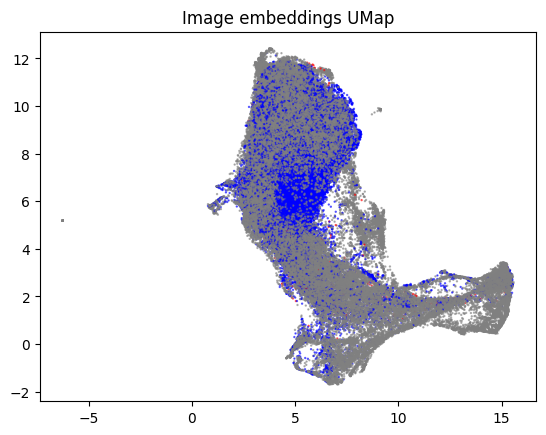

In [ ]:
label_to_color = {
    'Gleason Pattern 3+4': 'blue',
    'Gleason Pattern 4+3': 'red',
    'None': 'gray'  # Default color for patches without a label
}

colors = [label_to_color.get(patch['label'], 'gray') for patch in labeled_patches]
plt.scatter(pca_cell_f[:, 0], pca_cell_f[:, 1], marker=".", c=colors, alpha=0.6, s=2)
plt.title("Image embeddings UMap")
# save_to = os.path.join(output_dir, example_f.replace(".h5", "_")+"embed_umap.png")
# plt.savefig(save_to)
# plt.close()
plt.show()

In [ ]:
# Check the pt file, which saves the feature/embedding of image patches 
import torch
import os

data_dir = "/data/jjiang10/Data/ProstatePathology/features/pt_files" # patch embeddings
example_f = "TCGA-YL-A9WI-01Z-00-DX4.DD0313AF-7339-45F1-B3CF-AE9C20679E7F.pt"

pt_fn = os.path.join(data_dir, example_f)
pt_features = torch.load(pt_fn)
print(pt_features.shape)

torch.Size([75311, 1024])


In the patch extraction step. The CLAM tool only saves the coordinates into the .h5 files (in folder processed/patches/).
In the feature extraction step. The CLAM tool saves the both coordinates and features/embeddings into the .h5 files. But, it also save another copy of features/embeddings into the .pt files (in folder features/).

### Compare image embeddings 
Features from the default and CONCH model can be different. CONCH could be more differentiable than the features from the default model. Draw the UMAP of the features from CONCH, and label each sample with different colors.
Please check [Feature_UMAP.py](Feature_UMAP.py)

## TODO: How about image embeddings from UNI and CTransPath?